# Chapter 9. Plotting and Visualization

Making informative visualisations (sometimed called plots) is one of the most important tasks in data analysis. It may be part of the exploratory process to help identify outliers or needed data transformations. 

## A brief matplotlib API primer

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime
%matplotlib inline

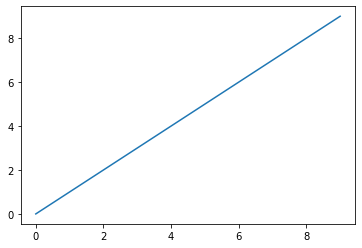

In [3]:
data = np.arange(10)
plt.plot(data)

While libraries like seaborn and pandas’s built-in plotting functions will deal with many of the mundane details of making plots, should you wish to customize them beyond the function options provided, you will need to learn a bit about the matplotlib API.

### Figures and Subplots

Plots in matplotlib reside within a Figure object. You can create a new figure with plt.figure

In IPython, an empty plot window will appear, but in Jupyter nothing will be shown until we use a few more commands. plt.figure has a number of options; notably, figsize will guarantee the figure has a certain size and aspect ratio if saved to disk. You can’t make a plot with a blank figure. You have to create one or more subplots using add_subplot

This means that the figure should be 2 × 2 (so up to four plots in total), and we’re selecting the first of four subplots (numbered from 1).

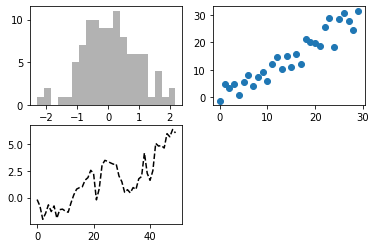

In [4]:
np.random.seed(1) 
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))
plt.plot(np.random.randn(50).cumsum(), 'k--')

For more information, check the documentation for [Matplotlib](https://matplotlib.org/).

Creating a figure with a grid of subplots is a very common task, so matplotlib includes a convenience method, *plt.subplots* that creates a new figure and returns a NumPy array containing the created subplot objects:

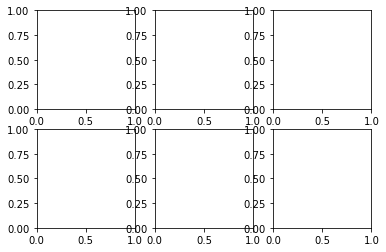

In [5]:
fig, axes = plt.subplots(2, 3)

This is very useful, as the axes array can easily be indexed like a two-dimensional array.

### Adjusting the spacing around objects

By default matplotlib leaves a certain amount of padding around the outside of the subplots and spacing between subplots. This can be changes like so:

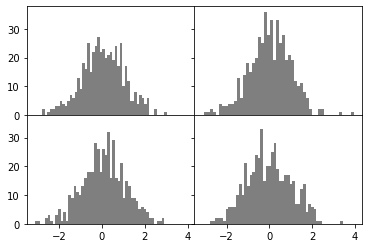

In [6]:
# Add seed for pseudorandom algorithm for repeatability
np.random.seed(1)
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)

# To remove spacing
plt.subplots_adjust(wspace=0, hspace=0)

### Color, Markers and Line Styles

Matplotlib's main plot function accepts arrays of x and y coordinates and optionally a string abbreviation indicatingcolor and line style. For example, to plot x vs y with green dashes, you would execute:

In [7]:
# ax.plot(x, y, 'g--')

This way of specifying both color and line style in a string is provided as convenience; in practice if yoy were creating plots programatically you might prefer not no munge strings together to create plots with the desired style. 

In [8]:
# ax.plot(c, y, linestyel='--', color='g')

### Example:

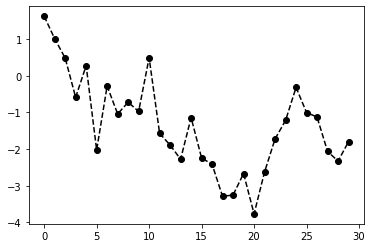

In [9]:
"""
This plot uses dashed lines, This could also be written explicitly as:

plt.plot(np.random.randn(30).cumsum(), clor='k', linestyle='dashed')
"""
np.random.seed(1)
plt.plot(np.random.randn(30).cumsum(), 'ko--')

For line plots, you may notice that subsequent points are linearly interpolated by default. Yhis can be altered with the drawstyle option:

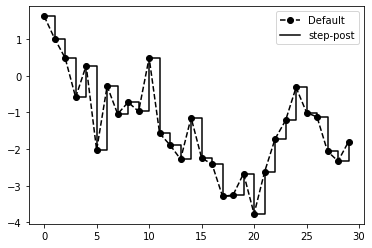

In [10]:
np.random.seed(1)
data = np.random.randn(30).cumsum()
plt.plot(data, 'ko--', label='Default')
plt.plot(data, 'k-', drawstyle='steps-post', label='step-post')
plt.legend(loc='best')

### Ticks, labels and legends

For most kindsof plot decorations, there are two main ways to do things: using the procedural pyplot interface (i.e, matplotlib.pyplot) and the more object-oriented native matplotlib API.

The yplot interface designed for interactive use, consists of methods like xlim, xticks and xticklabels. These control the plot rande, tick locations and thick labels, respectively. Thet can be used in two ways:

* Called with no arguments returns the current parameter value (e.g plt.xlim() returns the current x-axis plotting range)
* Called with parameters setsthe parameter value (e.g, plt.xlim(0, 10))

All such methods act on the active or most recently created AxesSubplot. 

### Setting the title, axis labels, ticks and ticklabels



Text(0.5, 0, 'Stages')

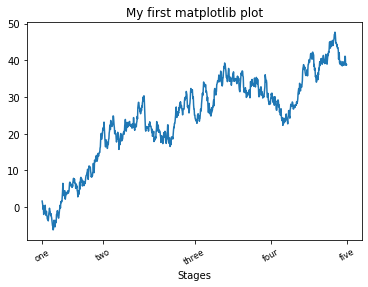

In [11]:
# Add seed to pseudorandom number generator for repeatability
np.random.seed(1)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())
# Set x axis ticks
ticks = ax.set_xticks([0, 200, 500, 750, 1000])
# Set x axis ticks labels
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'], rotation=30, fontsize='small')
# Set title
ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')

### Adding legends

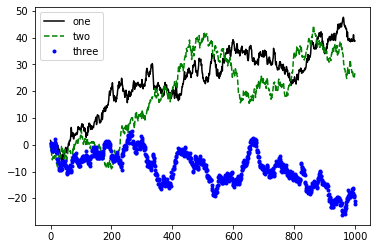

In [12]:
# Set seed for pseudorandom number algorithm
np.random.seed(1)
# Plot figure
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum(), 'k', label='one')
ax.plot(np.random.randn(1000).cumsum(), 'g--', label='two')
ax.plot(np.random.randn(1000).cumsum(), 'b.', label='three')
ax.legend(loc='best')

### Annotations and Drawing on a Subplot

In addition to the standard plot types, you may wish to draw your own plot annotations, which could consist of text, arrows, or other shapes. 

Text(0.5, 1.0, 'Important dates in the 2008-2009 finacial crisis')

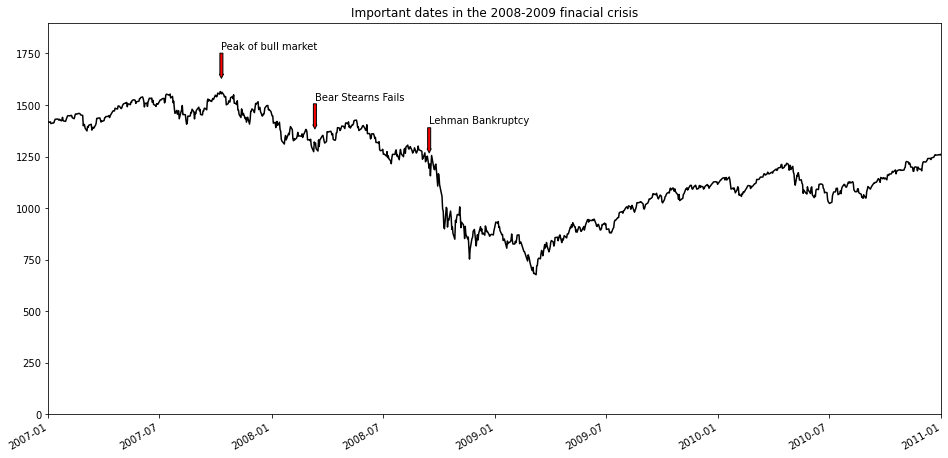

In [13]:
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(1, 1, 1)
data = pd.read_csv('examples/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='k-')

crisis_data = [
    (datetime(2007, 10, 11),'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label,
                xy=(date, spx. asof(date) + 75),
                xytext=(date, spx.asof(date) + 255),
                arrowprops=dict(facecolor='red',
                               headwidth=4,
                               width=3,
                               headlength=4),
                horizontalalignment='left',
                verticalalignment='top'
            )
# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([0, 1900])
ax.set_title('Important dates in the 2008-2009 finacial crisis')

In [14]:
To add a shape to a plot, you create the patch object shp and add it to a subplot by calling ax.add_patch(shp)

SyntaxError: invalid syntax (<ipython-input-14-2458bacf594c>, line 1)

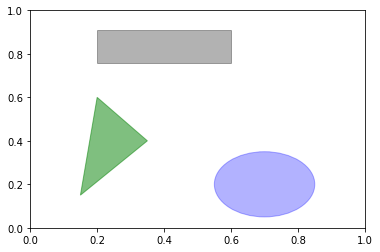

In [15]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.76), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]], color='g', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

### Saving plots to file

In [16]:
plt.savefig('figpath.svg')

<Figure size 432x288 with 0 Axes>

### Matplotlib configuration

Matplotlib comes configured with color schemes and defaults that are geared primarily toward preparing figures for publication. 

In [17]:
# Set default figure size to (10, 10)
#plt.rc('figure', figsize=(10, 10))

#font_options = {'family' : 'monospace',
                #'weight' : 'bold',
                #'size'   : 8}
#plt.rc('font', **font_options)

## Plotting with pandas and seaborn

Matplotlib can be fairly low-level. Therefore there exists libraries that simplifies common visualisations.

### Line Plots

Series and DataFrame each have a plot attribute for making basic plot types. 

<AxesSubplot:>

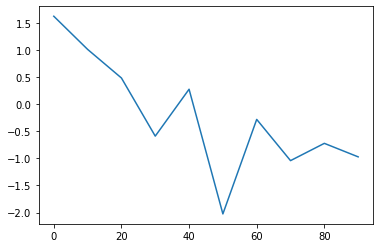

In [18]:
np.random.seed(1)
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

<AxesSubplot:>

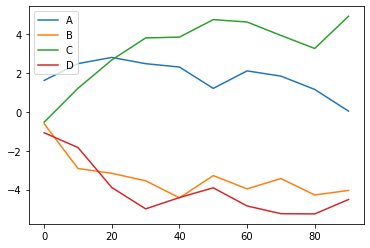

In [19]:
np.random.seed(1)
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0), columns = ['A', 'B', 'C', 'D'],
                  index = np.arange(0, 100, 10))
df.plot()

### Bar Plots

The plot.bar() and plot.barh() make vertical and horizontal bar plots, respectively. In this case, the Seres or DataFrame index will be used as the x(bar) or y(barh) ticks

<AxesSubplot:>

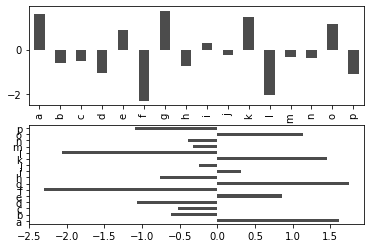

In [20]:
np.random.seed(1)
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.randn(16), index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0], color='k', alpha=0.7)
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

<AxesSubplot:>

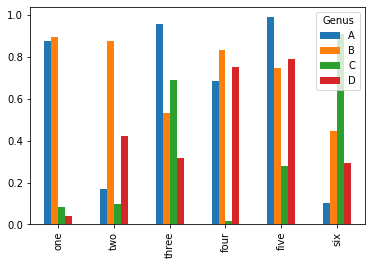

In [21]:
df = pd.DataFrame(np.random.rand(6, 4), index = ['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df
df.plot.bar()

<AxesSubplot:>

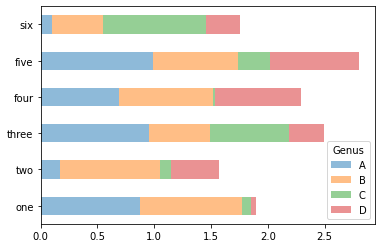

In [22]:
df.plot.barh(stacked=True, alpha=0.5)

In [23]:
tips = pd.read_csv('examples/tips.csv')
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [24]:
party_counts = pd.crosstab(tips['day'], tips['size'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [25]:
party_counts = party_counts.loc[:, 2:5]
party_pcts = party_counts.div(party_counts.sum(1), axis=0)
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


<AxesSubplot:xlabel='day'>

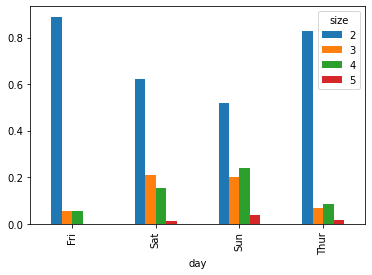

In [26]:
party_pcts.plot.bar()

<AxesSubplot:xlabel='tip_pct', ylabel='day'>

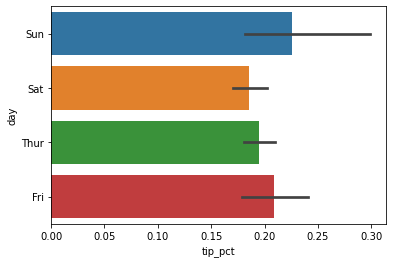

In [27]:
import seaborn as sns
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips.head()
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

<AxesSubplot:xlabel='tip_pct', ylabel='day'>

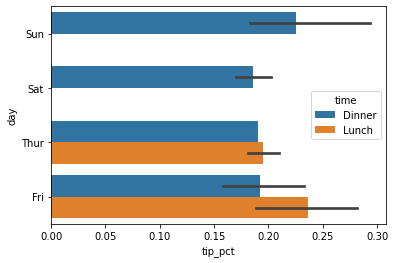

In [28]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

### Histograms and Density plots

A histogram is a kind of bar plot that discretisises values.

<AxesSubplot:ylabel='Frequency'>

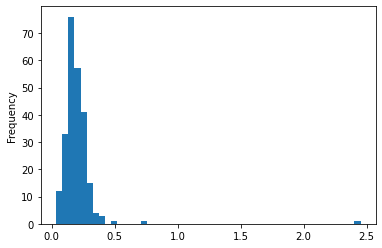

In [29]:
tips['tip_pct'].plot.hist(bins=50)

A related plot type is the density plot, which is formed by computing the estimate of a continuous probability distribution that might have generated the observed data. 

<AxesSubplot:ylabel='Density'>

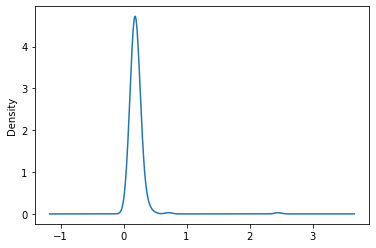

In [30]:
tips['tip_pct'].plot.density()

Seaborn makes this easier through its distplot

<AxesSubplot:ylabel='Density'>

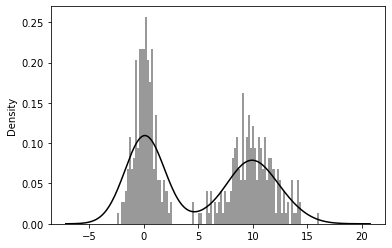

In [31]:
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))
sns.distplot(values, bins=100, color='k')

### Scatter or Point Plots

Point plots or scatter plots can be a useful way of examining the relationship between two one-dimensional data series.

In [32]:
macro = pd.read_csv('examples/macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


Text(0.5, 1.0, 'Changes in log m1 versus unemp')

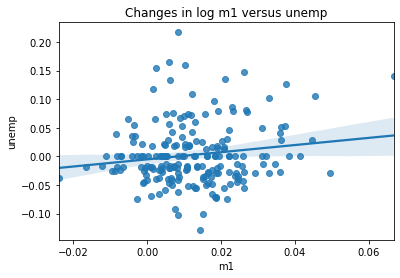

In [36]:
sns.regplot('m1', 'unemp', data=trans_data)
plt.title('Changes in log %s versus %s' % ('m1', 'unemp'))

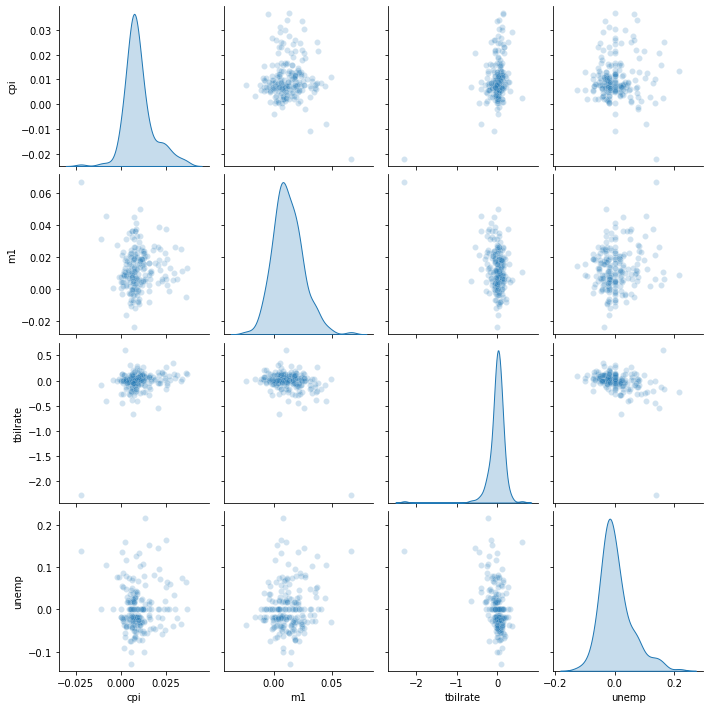

In [40]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2})

### Facet grids and categorical data

What about datasets where we have additional grouping dimensions? One way to visualise data with many categorical variables is to use a facet grid. Seaborn makes this easily done like so:

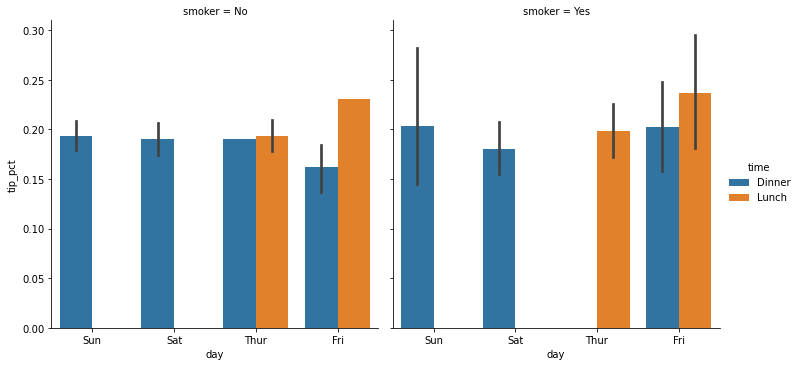

In [44]:
sns.factorplot(x='day', y='tip_pct', hue='time', col='smoker', kind='bar', data=tips[tips.tip_pct < 1])

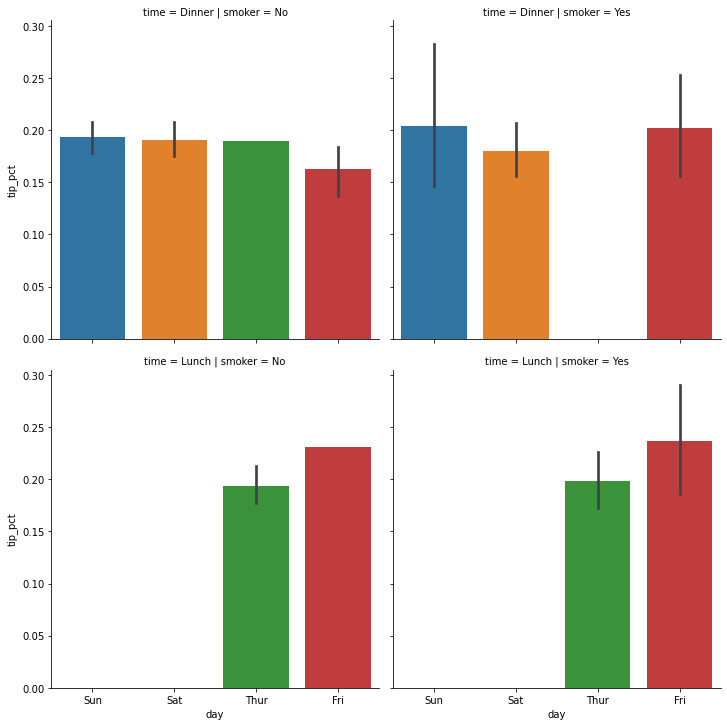

In [47]:
sns.factorplot(x='day', y='tip_pct', row='time', col='smoker', kind='bar', data=tips[tips.tip_pct < 1])

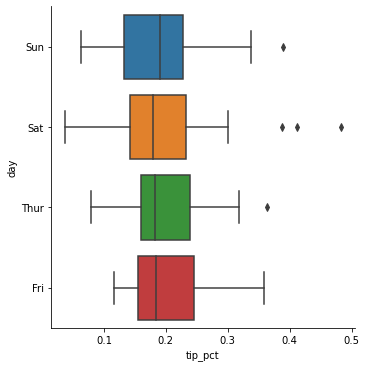

In [50]:
sns.factorplot(x='tip_pct', y='day', kind='box', data=tips[tips.tip_pct < 0.5])